<a href="https://colab.research.google.com/github/JUBRIL-ADEBOGUN/Crop-yield-modelling/blob/main/Crop_yield_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CROP YIELD ESTIMATION.

In [ ]:
# Import libraries
import pandas as pd, seaborn as sns, random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set seed for reproducability

SEED = 2023
random.seed(SEED)
np.random.seed(SEED)
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load files
data_path = '/content/drive/MyDrive/Digital Ocean /'
train = pd.read_csv(data_path + 'Train.csv')
var_desc = pd.read_csv(data_path + 'VariableDescription.csv')

#DATA EXPLORATION.

In [ ]:
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,200.0,2.0,NaN,NaN,NaN,NaN,2,Urea,NaN,20.0,Broadcasting,Urea,15.0,18.0,NaN,NaN,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,125.0,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,10.0,Broadcasting,Urea,20.0,39.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.0,Boring,Electric,80.0,2.0,Ganaura FYM,1.0,1.0,SoilApplied,2,DAP,4.0,NaN,SoilApplied,Urea,5.0,65.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,NaN,NaN,NaN,Ganaura,1.0,NaN,SoilApplied,2,DAP Urea,6.0,3.0,Broadcasting,Urea,5.0,5.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.0,Boring,Electric,300.0,2.0,NaN,NaN,NaN,NaN,2,Urea DAP,15.0,30.0,Broadcasting,Urea,30.0,26.0,NaN,NaN,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [ ]:
#train.info()

In [ ]:
pd.DataFrame(train.dtypes.to_dict(), index=['dtype']).T

,dtype
ID,object
District,object
Block,object
CultLand,int64
CropCultLand,int64
LandPreparationMethod,object
CropTillageDate,object
CropTillageDepth,int64
CropEstMethod,object
RcNursEstDate,object


# DATA VALIDATION.

Transforming date columns to datetime data type.

In [ ]:
dates = ['Threshing_date', 'Harv_date', 'SeedingSowingTransplanting',
          'RcNursEstDate', 'CropTillageDate']

for date in dates:
    train[date]= pd.to_datetime(train[date], infer_datetime_format=True, errors='coerce')

In [ ]:
int_cols = ['SeedlingsPerPit', 'TransplantingIrrigationHours',
'CropOrgFYM', 'StandingWater', 'BasalDAP', 'BasalUrea', 'Ganaura',
'1tdUrea', '1appDaysUrea', '2tdUrea', '2appDaysUrea']

Filtering categorical and numerical columns from the dataframe.

In [ ]:
catcols = train.select_dtypes('object').columns
numcols = train.select_dtypes(np.number).columns

Checking categorical unique entries and frequency. While transforming less frequent entries to others.

In [ ]:
train.District.value_counts()

Nalanda     1193
Jamui       1127
Vaishali     980
Gaya         570
Name: District, dtype: int64

In [ ]:
train.Block.value_counts()

Rajgir        850
Jamui         626
Mahua         607
Khaira        500
Gurua         358
Noorsarai     343
Chehrakala    239
Wazirganj     213
Garoul        134
Name: Block, dtype: int64

TransplantingIrrigationSource: Source of water for irrigation during Transplanting.

In [ ]:
train.TransplantingIrrigationSource.value_counts()

Boring      3228
Canal        373
Rainfed      103
Pond          36
TubeWell      12
Well           3
Name: TransplantingIrrigationSource, dtype: int64

In [ ]:
train[catcols]=train[catcols].fillna('None')

In [ ]:
train.loc[train['TransplantingIrrigationSource'].value_counts()[train.TransplantingIrrigationSource].values <100, 'TransplantingIrrigationSource'] ='other'
train['TransplantingIrrigationSource'].value_counts()

Boring     3228
Canal       373
None        115
Rainfed     103
other        51
Name: TransplantingIrrigationSource, dtype: int64

In [ ]:
train.TransplantingIrrigationPowerSource.value_counts()

Electric    2645
Diesel       720
None         503
Solar          2
Name: TransplantingIrrigationPowerSource, dtype: int64

FirstTopDressFert: Which type of chemical fertilizer has been applied in the second dose                        .

In [ ]:
train['FirstTopDressFert'].value_counts()

Urea            2798
None             485
DAP Urea         322
Urea DAP         177
DAP               64
NPKS Urea          6
Urea NPKS          5
NPK                3
DAP NPKS           3
NPK Urea           2
DAP NPK Urea       1
Urea NPK           1
DAP NPK            1
Urea SSP           1
Other Urea         1
Name: FirstTopDressFert, dtype: int64

In [ ]:
train.loc[train['FirstTopDressFert'].value_counts()[train.FirstTopDressFert].values <100, 'FirstTopDressFert'] ='other'
train['FirstTopDressFert'].value_counts()

Urea        2798
None         485
DAP Urea     322
Urea DAP     177
other         88
Name: FirstTopDressFert, dtype: int64

MineralFertAppMethod: Method of applying chemical fertilizer in your current crop during land preparation.

In [ ]:
train.MineralFertAppMethod.value_counts()

Broadcasting       3214
SoilApplied         638
RootApplication      18
Name: MineralFertAppMethod, dtype: int64

CropbasalFerts: Which type of chemical fertilizer has been applied during land preparation.

In [ ]:
train.CropbasalFerts.value_counts()

DAP Urea             1640
DAP                  1379
Urea                  308
None                  188
Urea DAP              134
DAP Other              70
DAP Urea SSP           51
NPK                    29
DAP Urea NPKS          18
NPK Urea                8
Urea DAP SSP            7
Urea NPKS               6
Urea DAP NPKS           3
DAP NPKS                3
DAP SSP                 3
Urea NPKS DAP           3
DAP NPK Urea            2
DAP Urea NPK            1
Urea DAP MoP            1
SSP Urea                1
NPKS                    1
DAP NPKS Urea           1
NPKS DAP Urea           1
DAP Urea NPKS MoP       1
DAP NPKS Urea SSP       1
Urea SSP                1
Urea NPK                1
DAP NPKS Other          1
NPK DAP Urea            1
DAP Urea SSP MoP        1
DAP MoP                 1
DAP Urea NPKS SSP       1
DAP Urea MoP            1
Urea SSP DAP            1
Urea Other DAP          1
Name: CropbasalFerts, dtype: int64

In [ ]:
train.loc[train['CropbasalFerts'].value_counts()[train.CropbasalFerts].values <100, 'CropbasalFerts'] ='other'
train['CropbasalFerts'].value_counts()

DAP Urea    1640
DAP         1379
Urea         308
other        221
None         188
Urea DAP     134
Name: CropbasalFerts, dtype: int64

In [ ]:
train['MineralFertAppMethod.1'].value_counts()

Broadcasting       3288
None                481
SoilApplied          64
RootApplication      37
Name: MineralFertAppMethod.1, dtype: int64

In [ ]:
train.Harv_method.value_counts()

hand       3642
machine     228
Name: Harv_method, dtype: int64

LandPreparationMethod: Method for land preparation.

In [ ]:
train.LandPreparationMethod.nunique()

43

In [ ]:
train.loc[train['LandPreparationMethod'].value_counts()[train.LandPreparationMethod].values <80, 'LandPreparationMethod'] ='other'
train['LandPreparationMethod'].value_counts()

TractorPlough                                              1038
TractorPlough FourWheelTracRotavator                       1025
WetTillagePuddling TractorPlough FourWheelTracRotavator     569
other                                                       392
WetTillagePuddling TractorPlough BullockPlough              234
WetTillagePuddling FourWheelTracRotavator                   211
TractorPlough BullockPlough                                 173
WetTillagePuddling TractorPlough                            135
FourWheelTracRotavator TractorPlough                         93
Name: LandPreparationMethod, dtype: int64

CropEstMethod: Method of transplantation.

In [ ]:
train.CropEstMethod.value_counts()

Manual_PuddledRandom      3346
Manual_PuddledLine         235
LineSowingAfterTillage     206
Broadcasting                83
Name: CropEstMethod, dtype: int64

NursDetFactor: What are the reason of choosing the date of nursery.

In [ ]:
train.NursDetFactor.nunique()

126

TransDetFactor: What are the reason for choosing the date of transplantation.

In [ ]:
train.TransDetFactor.nunique()

156

OrgFertilizers: What organic fertilizer has the farmer used during transplantation.

In [ ]:
train.OrgFertilizers.nunique()

32

In [ ]:
train.loc[train['OrgFertilizers'].value_counts()[train.OrgFertilizers].values <80, 'OrgFertilizers'] ='other'
train['OrgFertilizers'].value_counts()

None           1335
Ganaura        1295
FYM            1035
other           121
Ganaura FYM      84
Name: OrgFertilizers, dtype: int64

In [ ]:
train.Threshing_method.value_counts()

machine    2098
hand       1772
Name: Threshing_method, dtype: int64

In [ ]:
train.Harv_method.value_counts()

hand       3642
machine     228
Name: Harv_method, dtype: int64

Numerical columns details and basic statistics.

* CropCulttland : Area of land under cultivation.

* Seedlings Per Pit: Seedling planted per pit.

* TransplantingIrrigationHours: Hours of irrigation during transplantation.

* StandingWater: How many days of standing water was there in the field.

* Ganaura: Amount of organic fertilizer used (in Quintals).

* CropOrgFYM: Amount of FYM (Farm yard manure) organic fertilizer used (in Quintals).

* NoFertilizerAppln: Number of times chemical fertilizer has been applied in the entire crop cycle.

* BasalDAP: Amount of DAP(in kgs)applied during land preparation.

* BasalUrea: Amount of urea(in kgs) applied during land preparation.

* 1tdUrea: Amount of urea (in kgs) applied in the second dose.

* 1appDaysUrea: How many days after first dose was second dose of urea was given.

* 2tdUrea: Amount of urea (in kgs) applied in the third dose.
                
* 2appDaysUrea: How many days after second dose was third dose of urea was given.

* Acre: Area of land under cultivation in acres.

* Yield: Yield of the current crop

Checking numerical columns basic summary.

In [ ]:
train[numcols].describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3581.000000,3677.000000,2988.000000,3632.000000,1453.000000,1196.000000,3870.000000,3327.000000,2166.000000,3314.000000,3314.000000,1176.000000,1170.000000,3618.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,29.731590,57.445652,2.184496,11.452359,13.351801,11.513881,29.200362,7.375000,58.764957,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.624397,42.612470,419.724782,2.207276,122.680882,328.251615,0.634632,8.422049,9.701597,8.715856,12.139109,5.932502,11.356588,1138.613827,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,1.000000,1.000000,2.000000,6.000000,7.000000,6.000000,23.000000,4.000000,58.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,250.000000,3.000000,3.000000,2.000000,2.000000,10.000000,10.000000,10.000000,28.000000,6.000000,60.000000,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,450.000000,4.000000,4.000000,5.000000,3.000000,15.000000,16.000000,15.000000,36.000000,10.000000,65.000000,700.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,1400.000000,4000.000000,4.000000,100.000000,90.000000,90.000000,332.000000,67.000000,97.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


In [ ]:
train[train.SeedlingsPerPit>50.0]

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
131,ID_X6CATJS53FN6,Vaishali,Mahua,8,3,TractorPlough FourWheelTracRotavator,2022-06-25,4,Manual_PuddledRandom,2022-06-03,2022-07-06,442.0,CalendarDate IrrigWaterAvailability,CalendarDate SeedlingAge RainArrival IrrigWate...,1.0,Boring,Diesel,200.0,2.0,Ganaura,1.0,NaN,SoilApplied,3,DAP,6.0,NaN,Broadcasting,Urea,6.0,25.0,4.0,65.0,Broadcasting,hand,2022-11-05,400.0,2022-11-20,hand,30,10,plowed_in_soil,0.090909,140


In [ ]:
train[train.TransplantingIrrigationHours> 500]

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
2406,ID_SHZUBWIYLR56,Jamui,Jamui,30,25,WetTillagePuddling TractorPlough BullockPlough,2022-07-14,3,Manual_PuddledRandom,2022-07-11,2022-08-02,4.0,CalendarDate,CalendarDate,2000.0,Boring,Electric,2600.0,1.0,Ganaura,4.0,NaN,Broadcasting,2,DAP Urea,10.0,10.0,Broadcasting,other,NaN,NaN,NaN,NaN,Broadcasting,hand,2022-11-22,200.0,2023-02-21,machine,28,10,plowed_in_soil,0.227273,400


In [ ]:
train[train.Ganaura>1000.0]

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
1473,ID_09XSFI4DVG0U,Nalanda,Rajgir,64,50,other,2022-06-15,5,Manual_PuddledRandom,2022-06-16,2022-07-12,1.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,12.0,Boring,Electric,250.0,2.0,Ganaura,1200.0,NaN,Broadcasting,2,DAP Urea,10.0,10.0,Broadcasting,Urea,10.0,25.0,NaN,NaN,Broadcasting,hand,2022-11-05,500.0,2022-11-11,hand,23,10,plowed_in_soil,0.3125,650
3022,ID_ASQ1AL8RQTY0,Nalanda,Rajgir,64,32,other,2022-06-09,6,Manual_PuddledRandom,2022-06-11,2022-07-05,1.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,8.0,Boring,Electric,2.0,2.0,Ganaura,1400.0,NaN,Broadcasting,2,DAP Urea,10.0,10.0,Broadcasting,Urea DAP,10.0,10.0,NaN,NaN,Broadcasting,hand,2022-11-08,530.0,2022-11-18,hand,23,10,plowed_in_soil,0.3125,600


In [ ]:
train[train.CropOrgFYM>1000].head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
96,ID_5YD6FBO5NOPR,Vaishali,Garoul,18,18,other,2022-07-03,6,Manual_PuddledRandom,2022-06-22,2022-07-14,2.0,IrrigWaterAvailability,SeedlingAge,15.0,Boring,Diesel,1500.0,2.0,FYM,NaN,1500.0,SoilApplied,2,Urea DAP,36.0,18.0,SoilApplied,other,30.0,20.0,NaN,NaN,Broadcasting,hand,2022-10-23,2000.0,2022-11-03,hand,28,10,plowed_in_soil,0.818182,1620
182,ID_HCFBHUMWDOU7,Vaishali,Garoul,11,11,TractorPlough,2022-07-14,6,Manual_PuddledLine,2022-06-10,2022-07-21,2.0,IrrigWaterAvailability SeedAvailability,SeedlingAge IrrigWaterAvailability,10.0,Boring,Diesel,1000.0,1.0,FYM,NaN,1100.0,SoilApplied,2,DAP Urea,30.0,20.0,SoilApplied,other,20.0,15.0,NaN,NaN,Broadcasting,hand,2022-10-20,1000.0,2022-10-30,hand,25,10,plowed_in_soil,0.500000,880
308,ID_2N2FOV866XLH,Vaishali,Garoul,30,30,other,2022-06-20,6,Manual_PuddledLine,2022-06-21,2022-07-05,2.0,IrrigWaterAvailability,SeedlingAge,20.0,Boring,Diesel,2500.0,2.0,FYM,NaN,2000.0,SoilApplied,1,other,NaN,20.0,SoilApplied,None,NaN,NaN,NaN,NaN,None,hand,2022-10-17,1500.0,2022-10-27,hand,20,10,plowed_in_soil,0.909091,1600
321,ID_91I51FGGV21J,Vaishali,Garoul,30,30,TractorPlough,2022-07-10,6,Manual_PuddledLine,2022-06-05,2022-07-14,2.0,SeedAvailability,SeedlingAge,30.0,Boring,Electric,3000.0,2.0,FYM,NaN,3000.0,SoilApplied,1,other,60.0,30.0,SoilApplied,None,NaN,NaN,NaN,NaN,None,hand,2022-10-01,3000.0,2022-10-10,hand,22,10,plowed_in_soil,1.363636,2700
365,ID_0BZM6A6ZJX4X,Vaishali,Garoul,22,22,TractorPlough,2022-06-25,6,Manual_PuddledRandom,2022-06-25,2022-07-15,2.0,SeedAvailability,SeedlingAge,20.0,Boring,Diesel,2000.0,1.0,FYM,NaN,2000.0,SoilApplied,1,other,44.0,22.0,SoilApplied,None,NaN,NaN,NaN,NaN,None,hand,2022-10-10,2500.0,2022-10-20,hand,25,10,plowed_in_soil,1.000000,1870


In [ ]:
train[train.Acre>1.5]

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
526,ID_T60PQF5J7DXV,Jamui,Jamui,40,40,WetTillagePuddling TractorPlough BullockPlough,2022-06-25,3,Manual_PuddledRandom,2022-07-18,2022-08-02,3.0,CalendarDate,CalendarDate,10.0,Boring,Diesel,3000.0,1.0,Ganaura,3.0,NaN,Broadcasting,2,DAP Urea,10.0,10.0,Broadcasting,other,NaN,NaN,NaN,NaN,Broadcasting,hand,2022-11-13,2000.0,2023-01-12,machine,26,10,plowed_in_soil,1.818182,3200
614,ID_IX01ID3YSXI2,Gaya,Gurua,50,50,TractorPlough FourWheelTracRotavator,2022-07-27,5,Manual_PuddledRandom,2022-06-25,2022-07-28,2.0,CalendarDate IrrigWaterAvailability,CalendarDate SeedlingAge RainArrival,18.0,Boring,Electric,750.0,2.0,Ganaura,3.0,NaN,SoilApplied,2,DAP,50.0,NaN,Broadcasting,Urea,50.0,28.0,NaN,NaN,Broadcasting,hand,2022-12-13,120.0,2022-12-20,machine,28,10,plowed_in_soil,1.851852,3900
1209,ID_N563JI7DNFQ9,Nalanda,Rajgir,260,260,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-12,3,Manual_PuddledRandom,2022-06-16,2022-07-14,1.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge IrrigWaterAvailabilit...,72.0,Boring,Electric,NaN,NaN,None,NaN,NaN,None,2,DAP Urea,100.0,70.0,Broadcasting,Urea,70.0,43.0,NaN,NaN,Broadcasting,machine,2022-11-15,NaN,2022-11-15,machine,29,40,plowed_in_soil,2.187500,4050
1393,ID_URKOCTJZZ85D,Gaya,Gurua,58,58,TractorPlough FourWheelTracRotavator,2022-07-24,5,Manual_PuddledRandom,2022-07-13,2022-07-25,3.0,CalendarDate IrrigWaterAvailability,CalendarDate SeedlingAge RainArrival IrrigWate...,9.0,Boring,Electric,300.0,3.0,other,1.0,NaN,Broadcasting,2,DAP,20.0,NaN,Broadcasting,Urea,20.0,31.0,NaN,NaN,Broadcasting,hand,2022-11-10,120.0,2022-12-07,hand,26,10,plowed_in_soil,1.925926,1400
2069,ID_8Q89DLWRMVEF,Jamui,Jamui,36,36,other,2022-06-27,4,Manual_PuddledRandom,2022-07-04,2022-08-02,3.0,CalendarDate,CalendarDate,4.0,Boring,Electric,200.0,1.0,Ganaura,4.0,NaN,Broadcasting,2,Urea DAP,10.0,15.0,Broadcasting,Urea,15.0,15.0,NaN,NaN,Broadcasting,hand,2022-11-23,2500.0,2023-01-25,machine,27,10,plowed_in_soil,1.636364,2880
3679,ID_3KR27BO0615L,Vaishali,Garoul,35,35,TractorPlough,2022-07-11,6,Manual_PuddledRandom,2022-06-11,2022-07-13,3.0,PreMonsoonShowers,LaborAvailability,NaN,None,None,NaN,2.0,None,NaN,NaN,None,2,other,NaN,70.0,SoilApplied,other,NaN,NaN,NaN,NaN,Broadcasting,hand,2022-10-27,4000.0,2022-11-07,hand,28,10,plowed_in_soil,1.590909,3150


In [ ]:
train[train.Yield>4000].head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
521,ID_T2LOCPFM5WTE,Jamui,Jamui,20,15,other,2022-06-28,4,Manual_PuddledRandom,2022-07-15,2022-08-12,4.0,CalendarDate,CalendarDate,5.0,Boring,Electric,500.0,NaN,Ganaura,5.0,NaN,Broadcasting,2,DAP Urea,16.0,16.0,Broadcasting,Urea,9.0,9.0,NaN,NaN,Broadcasting,hand,2022-11-19,300.0,2023-01-24,machine,27,10,plowed_in_soil,0.272727,6000
764,ID_12YY9WCJI5WH,Jamui,Jamui,22,22,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-10,5,Manual_PuddledRandom,2022-07-01,2022-07-23,5.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate,15.0,Boring,Electric,1200.0,2.0,Ganaura,4.0,NaN,Broadcasting,2,DAP Urea,9.0,5.0,Broadcasting,Urea,8.0,5.0,NaN,NaN,Broadcasting,hand,2022-11-04,2500.0,2022-12-07,machine,26,10,plowed_in_soil,1.000000,16800
842,ID_HSWMG2UG1PDM,Jamui,Jamui,20,20,WetTillagePuddling TractorPlough BullockPlough,2022-07-04,4,Manual_PuddledRandom,2022-07-15,2022-08-08,4.0,CalendarDate,CalendarDate,8.0,Boring,Electric,800.0,1.0,Ganaura,4.0,NaN,Broadcasting,2,DAP Urea,16.0,16.0,Broadcasting,Urea,7.0,7.0,NaN,NaN,Broadcasting,hand,2022-11-21,600.0,2023-01-14,machine,26,10,plowed_in_soil,0.454545,8000
909,ID_KCBT7VCA13K7,Jamui,Jamui,8,8,WetTillagePuddling TractorPlough BullockPlough,2022-07-07,4,Manual_PuddledRandom,2022-07-05,2022-07-14,4.0,CalendarDate,CalendarDate,10.0,Boring,Electric,2000.0,1.0,Ganaura,4.0,NaN,Broadcasting,2,DAP Urea,10.0,10.0,Broadcasting,other,NaN,NaN,NaN,NaN,Broadcasting,hand,2022-11-24,600.0,2022-12-24,machine,29,10,plowed_in_soil,0.363636,4780
1209,ID_N563JI7DNFQ9,Nalanda,Rajgir,260,260,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-12,3,Manual_PuddledRandom,2022-06-16,2022-07-14,1.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge IrrigWaterAvailabilit...,72.0,Boring,Electric,NaN,NaN,None,NaN,NaN,None,2,DAP Urea,100.0,70.0,Broadcasting,Urea,70.0,43.0,NaN,NaN,Broadcasting,machine,2022-11-15,NaN,2022-11-15,machine,29,40,plowed_in_soil,2.187500,4050


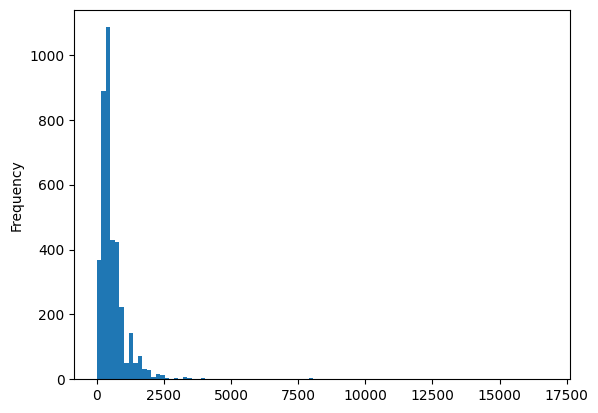

In [ ]:
train.Yield.plot(kind='hist', bins=100)
plt.show()

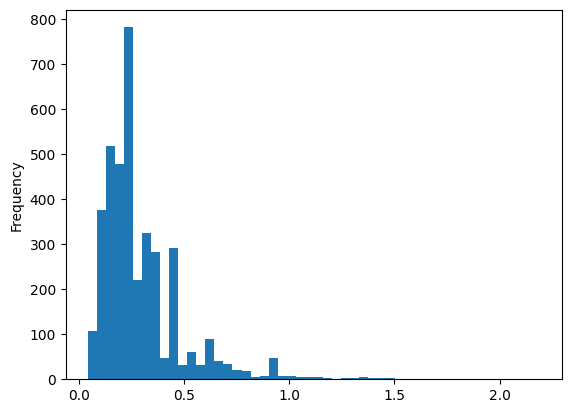

In [ ]:
train.Acre.plot(kind='hist', bins=50)
plt.show()

# DATA SUMMARISATION.

In [ ]:
train.groupby(['District', 'Block'])['CropCultLand', 'Ganaura', 'CropOrgFYM', 'NoFertilizerAppln', 'BasalDAP', 'BasalUrea', 'StandingWater', 'Acre', 'Yield'].agg(['mean', 'min', 'max','std'])

<ipython-input-42-86e4c42a1288>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby(['District', 'Block'])['CropCultLand', 'Ganaura', 'CropOrgFYM', 'NoFertilizerAppln', 'BasalDAP', 'BasalUrea', 'StandingWater', 'Acre', 'Yield'].agg(['mean', 'min', 'max','std'])


CropCultLand                        Ganaura               \
                            mean min  max        std       mean  min     max   
District Block                                                                 
Gaya     Gurua         26.016807   5  100  14.424532   1.792880  1.0    50.0   
         Wazirganj     22.953052   5   60  13.837250   3.147287  1.0    10.0   
Jamui    Gurua          5.000000   5    5        NaN   5.000000  5.0     5.0   
         Jamui         18.530351   4  100  15.068480   4.679901  2.0    45.0   
         Khaira        20.778000   5   60   9.596296   1.558824  1.0     3.0   
Nalanda  Noorsarai     36.507289   4  250  27.309132   1.050000  1.0     2.0   
         Rajgir        45.016471   2  800  45.620906  99.544304  1.0  1400.0   
Vaishali Chehrakala    10.163180   1   44   6.306804   1.818966  1.0     8.0   
         Garoul        12.126866   2   35   8.667996   3.000000  3.0     3.0   
         Mahua          7.714992   1   26   3.956799  16.466667  1.0    50.0   

                                 CropOrgFYM                           \
                            std        mean  min     max         std   
District Block                                                         
Gaya     Gurua         5.546950    1.830189  1.0    50.0    6.054470   
         Wazirganj     1.146331    4.325581  1.0     7.0    1.584462   
Jamui    Gurua              NaN    1.000000  1.0     1.0         NaN   
         Jamui         3.923937    4.000000  4.0     4.0         NaN   
         Khaira        0.746352    2.352518  1.0     9.0    0.948975   
Nalanda  Noorsarai     0.223607    1.000000  1.0     1.0    0.000000   
         Rajgir      220.527172   12.181159  1.0    80.0   10.732470   
Vaishali Chehrakala    1.161701    2.276190  1.0     8.0    1.164336   
         Garoul             NaN  632.356436  1.0  4000.0  958.237315   
         Mahua        22.794138    4.472554  1.0   600.0   32.647986   

                    NoFertilizerAppln                     BasalDAP        \
                                 mean min max       std       mean   min   
District Block                                                             
Gaya     Gurua               2.072829   1   3  0.430920   9.073446   3.0   
         Wazirganj           1.990610   1   3  0.137038   6.596154   2.0   
Jamui    Gurua               2.000000   2   2       NaN  16.000000  16.0   
         Jamui               2.105431   1   3  0.638801  13.027149   3.0   
         Khaira              2.462000   1   4  0.911162   9.434968   2.0   
Nalanda  Noorsarai           1.746356   1   3  0.461795  16.666667   4.0   
         Rajgir              2.080000   1   3  0.292344  14.925000   2.0   
Vaishali Chehrakala          2.025105   1   3  0.641196   8.211712   2.0   
         Garoul              1.917910   1   3  0.660923  17.771930   2.0   
         Mahua               2.686985   1   3  0.600505   9.021090   1.0   

                                       BasalUrea                         \
                       max        std       mean   min   max        std   
District Block                                                            
Gaya     Gurua        50.0   4.605112   6.105263   2.0  15.0   3.828181   
         Wazirganj    20.0   4.637631   6.671362   2.0  20.0   4.708981   
Jamui    Gurua        16.0        NaN  10.000000  10.0  10.0        NaN   
         Jamui        38.0   5.430592  12.672686   3.0  26.0   5.253213   
         Khaira       33.0   4.866874  11.374101   3.0  24.0   3.299700   
Nalanda  Noorsarai    60.0  10.663064  20.764151   4.0  90.0  12.453233   
         Rajgir      100.0  10.424613  13.635556   1.0  90.0  10.292773   
Vaishali Chehrakala   32.0   4.223962   8.385827   2.0  32.0   4.759364   
         Garoul      100.0  17.546921  25.912281   2.0  70.0  14.138702   
         Mahua        50.0   6.575904  10.511494   2.0  50.0   6.874379   

                    StandingWater                            Acre            

In [ ]:
train.groupby(['CropbasalFerts'])['CropCultLand', 'Ganaura', 'CropOrgFYM', 'NoFertilizerAppln', 'BasalDAP', 'BasalUrea', 'Acre', 'Yield'].agg(['mean', 'min', 'max','std'])

<ipython-input-43-68e3b11d13e8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby(['CropbasalFerts'])['CropCultLand', 'Ganaura', 'CropOrgFYM', 'NoFertilizerAppln', 'BasalDAP', 'BasalUrea', 'Acre', 'Yield'].agg(['mean', 'min', 'max','std'])


CropCultLand                        Ganaura               \
                       mean min  max        std       mean  min     max   
CropbasalFerts                                                            
DAP               19.382886   1  120  14.885481  17.771894  1.0   600.0   
DAP Urea          29.661585   1  800  37.399588  41.122312  1.0  1400.0   
None              29.441489   5  100  20.216523   3.986486  1.0     9.0   
Urea              28.363636   1  250  22.972386  76.450000  1.0   800.0   
Urea DAP          17.343284   1  120  19.711874   6.611111  1.0    50.0   
other             16.855204   2   96  12.726023   9.333333  1.0    18.0   

                            CropOrgFYM                           \
                       std        mean  min     max         std   
CropbasalFerts                                                    
DAP              85.228462    5.392405  1.0  1500.0   56.311527   
DAP Urea        148.107586   12.420091  1.0  1100.0   86.763238   
None              1.498237    2.250000  1.0     3.0    0.957427   
Urea            204.209414  113.780488  1.0  2000.0  416.213678   
Urea DAP         10.912157   72.129630  1.0  2300.0  370.092699   
other             5.482755  320.850299  1.0  4000.0  762.714830   

               NoFertilizerAppln                     BasalDAP              \
                            mean min max       std       mean  min    max   
CropbasalFerts                                                              
DAP                     2.498187   1   4  0.602815   9.185642  1.0   50.0   
DAP Urea                1.923171   1   3  0.437921  13.046951  1.0  100.0   
None                    2.914894   2   4  0.298287        NaN  NaN    NaN   
Urea                    1.616883   1   3  0.584245        NaN  NaN    NaN   
Urea DAP                2.052239   1   3  0.629084  13.261194  1.0   60.0   
other                   2.416290   1   3  0.699680  12.994253  2.0  100.0   

                           BasalUrea                            Acre  \
                      std       mean  min   max        std      mean   
CropbasalFerts                                                         
DAP              5.301811        NaN  NaN   NaN        NaN  0.275216   
DAP Urea         9.157672  12.713049  1.0  90.0   9.252537  0.297024   
None                  NaN        NaN  NaN   NaN        NaN  0.345714   
Urea                  NaN  16.778878  2.0  60.0   9.891160  0.298848   
Urea DAP         9.674343  12.761194  2.0  70.0   9.591803  0.291383   
other           14.259161  14.008929  3.0  70.0  13.196707  0.319050   

                                                   Yield             \
                     min       max       std        mean min    max   
CropbasalFerts                                                        
DAP             0.045455  1.925926  0.213074  570.728789   4   3900   
DAP Urea        0.045455  2.187500  0.189784  600.865244  10  16800   
None            0.090909  0.681818  0.117569  580.170213   7   1260   
Urea            0.045455  1.000000  0.172395  599.853896   4   2400   
Urea DAP        0.045455  1.636364  0.247896  639.805970  10   8000   
other           0.045455  1.590909  0.323535  668.809955   4   5300   

                            
                       std  
CropbasalFerts              
DAP             522.490764  
DAP Urea        784.800646  
None            228.950740  
Urea            370.947376  
Urea DAP        829.349745  
other           715.810710

#DATA IMPUTATION.

Addressing Missing Data

* Fill categorical columns with "None".

* Fill numerical columns with zero.

In [ ]:
df= pd.DataFrame()
df[numcols] =train[numcols].fillna(0)
df[int_cols]= df[int_cols].astype(np.int)

<ipython-input-44-485a0f473211>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[int_cols]= df[int_cols].astype(np.int)


In [ ]:
df[catcols] = train[catcols].values

In [ ]:

df[dates] = train[dates]
#df['Yield'] = train.Yield.values
df.columns[df.isnull().sum()>0]

Index(['RcNursEstDate'], dtype='object')

In [ ]:
df.head()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield,ID,District,Block,LandPreparationMethod,CropEstMethod,NursDetFactor,TransDetFactor,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,OrgFertilizers,PCropSolidOrgFertAppMethod,CropbasalFerts,MineralFertAppMethod,FirstTopDressFert,MineralFertAppMethod.1,Harv_method,Threshing_method,Stubble_use,Threshing_date,Harv_date,SeedingSowingTransplanting,RcNursEstDate,CropTillageDate
0,45,40,5,2,5,200.0,2,0,0,2,0,20,15,18,0,0,0.0,30,40,0.312500,600,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,TractorPlough FourWheelTracRotavator,Manual_PuddledRandom,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,Boring,Electric,None,None,Urea,Broadcasting,Urea,Broadcasting,machine,machine,plowed_in_soil,2022-11-16,2022-11-16,2022-07-21,2022-06-27,2022-07-20
1,26,26,5,2,5,125.0,3,0,0,2,15,10,20,39,0,0,3.0,24,10,0.312500,600,ID_TK40ARLSPOKS,Nalanda,Rajgir,WetTillagePuddling TractorPlough FourWheelTrac...,Manual_PuddledRandom,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,Boring,Electric,None,None,DAP Urea,Broadcasting,Urea,Broadcasting,hand,machine,plowed_in_soil,2022-12-24,2022-11-25,2022-07-20,2022-06-20,2022-07-18
2,10,10,6,2,4,80.0,2,1,1,2,4,0,5,65,0,0,480.0,30,10,0.148148,225,ID_1FJY2CRIMLZZ,Gaya,Gurua,TractorPlough FourWheelTracRotavator,Manual_PuddledRandom,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,Boring,Electric,Ganaura FYM,SoilApplied,DAP,SoilApplied,Urea,RootApplication,hand,machine,plowed_in_soil,2023-01-11,2022-12-12,2022-08-13,2022-06-20,2022-06-30
3,15,15,6,2,0,0.0,0,1,0,2,6,3,5,5,0,0,240.0,26,10,0.222222,468,ID_I3IPXS4DB7NE,Gaya,Gurua,TractorPlough FourWheelTracRotavator,Manual_PuddledRandom,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,None,None,Ganaura,SoilApplied,DAP Urea,Broadcasting,Urea,Broadcasting,hand,hand,plowed_in_soil,2022-12-29,2022-12-02,2022-07-17,2022-06-17,2022-06-16
4,60,60,4,2,9,300.0,2,0,0,2,15,30,30,26,0,0,0.0,24,40,0.468750,550,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,other,Manual_PuddledRandom,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,Boring,Electric,None,None,Urea DAP,Broadcasting,Urea,Broadcasting,machine,machine,plowed_in_soil,2022-12-02,2022-11-30,2022-07-20,2022-06-21,2022-07-19


#

# DATA VISUALISATION.

# .

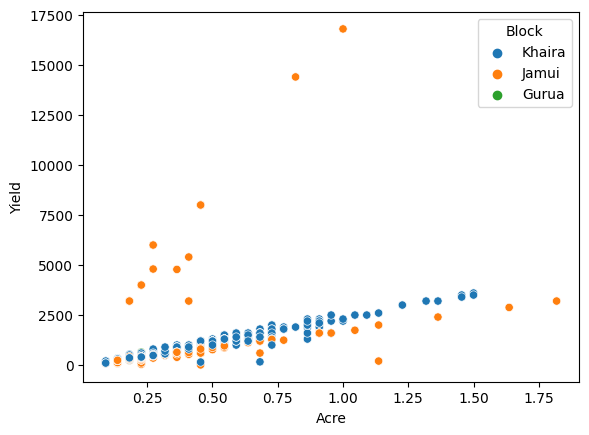

In [ ]:
sns.scatterplot(data=df[df.District =='Jamui'], x='Acre', y='Yield', hue='Block')
plt.show()

From the plots above we can deduce that the District:Jamui and the block Jamui has some crop yield that we can regard as outliers, that is, observation with Acre less than 1.5 and Yield > 2500.

Dividing the outliers by 10 may help reducing their effect on the dataset as a whole.

In [ ]:
outliers = df[np.logical_and(df.Acre < 1.5, df.Yield >2500)]
df.loc[outliers.index, 'Yield']= outliers.Yield/10

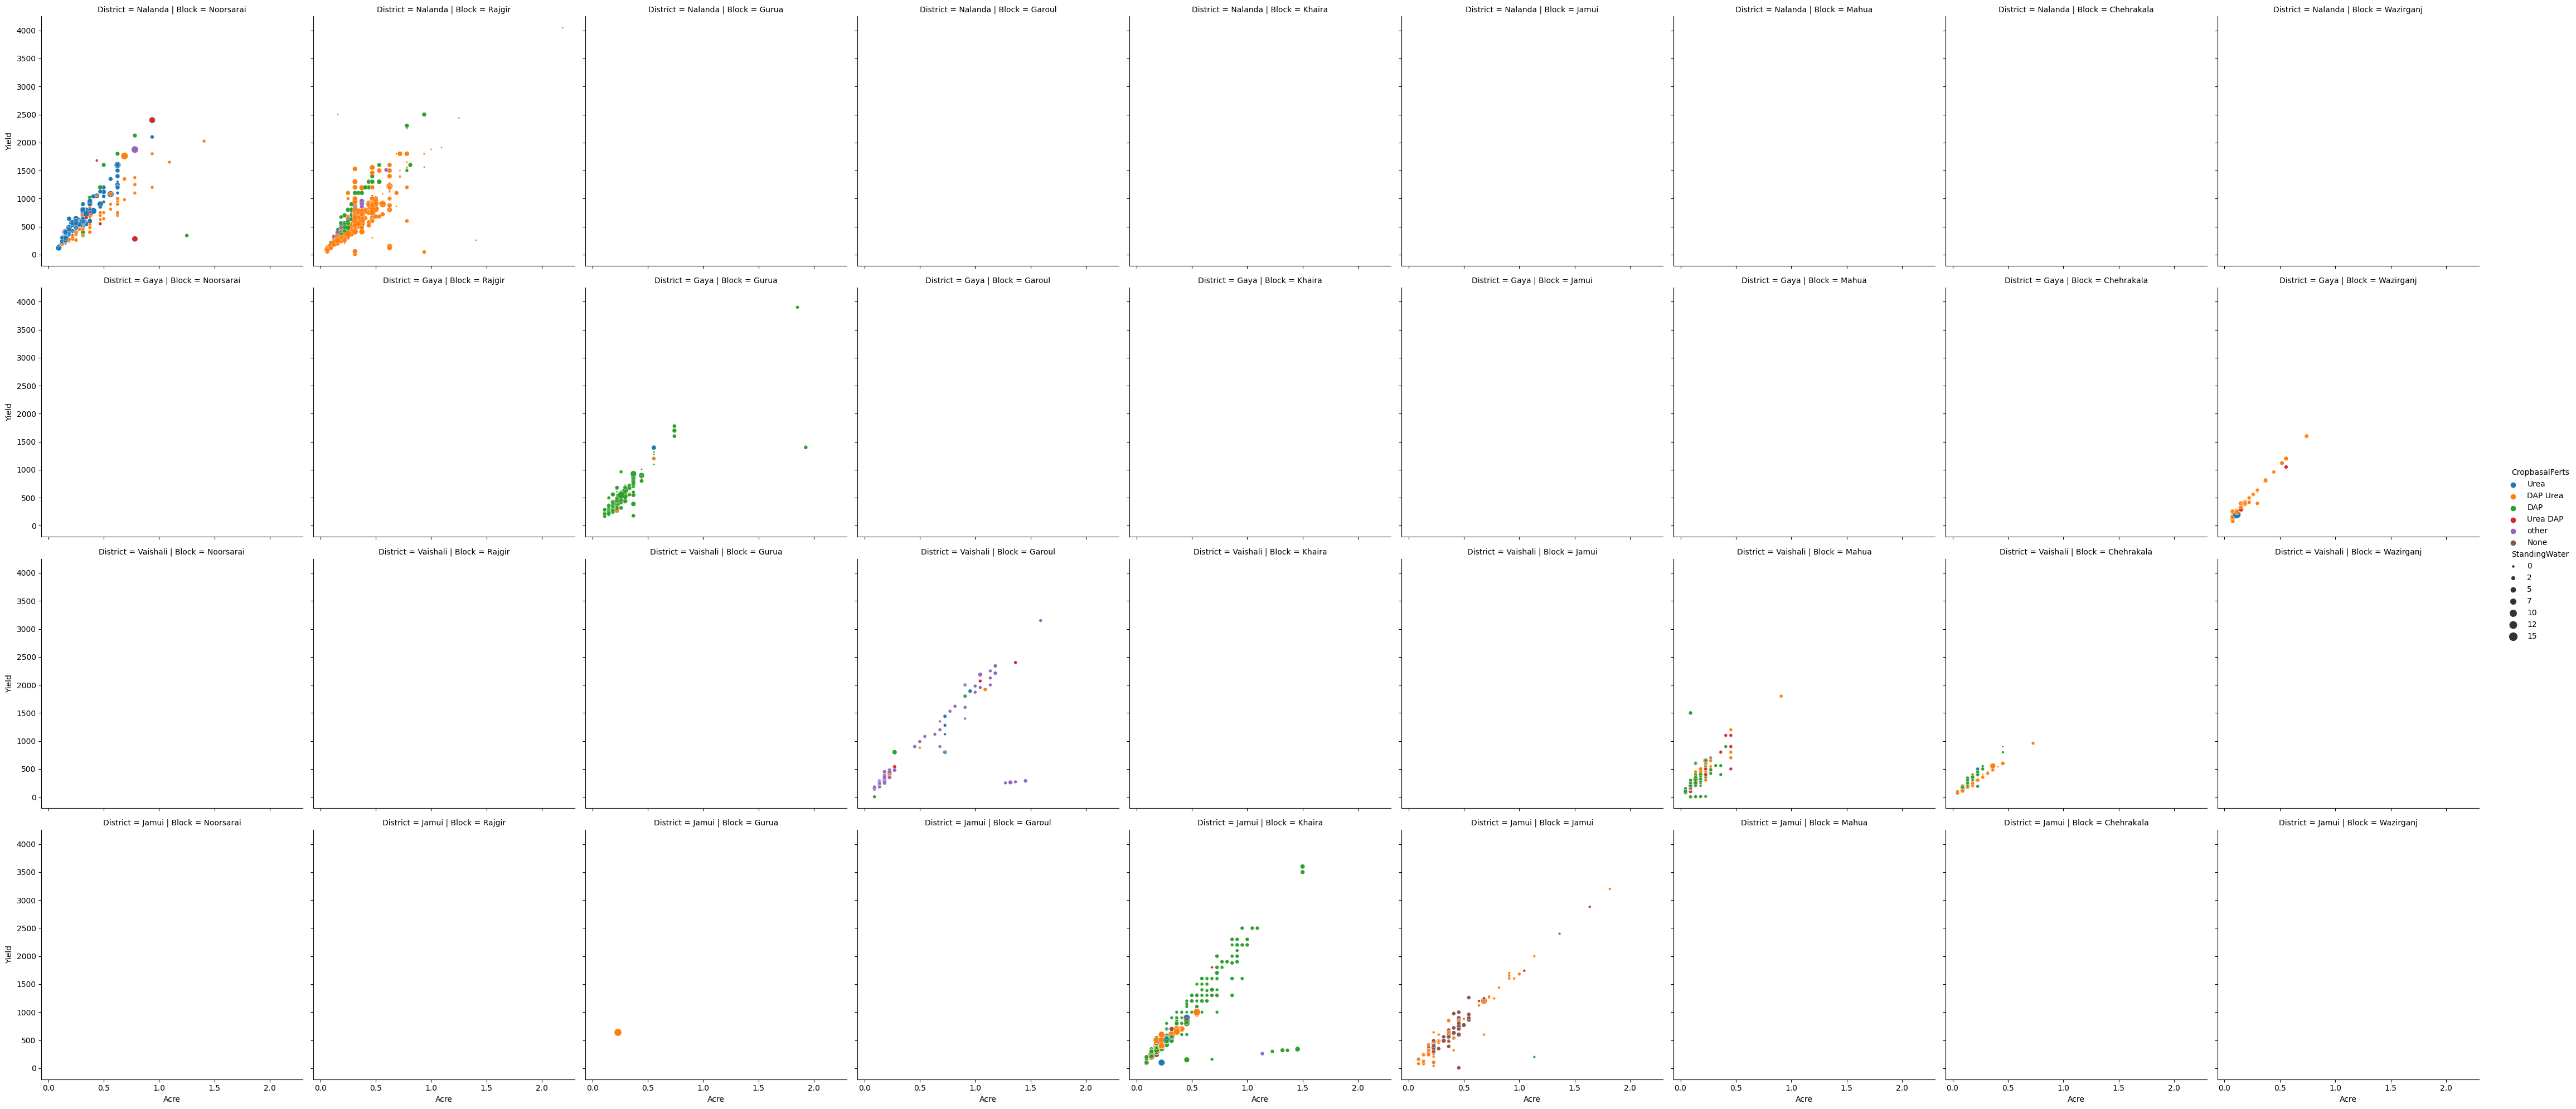

In [ ]:
sns.relplot(data=df, x='Acre', y='Yield',hue='CropbasalFerts', size='StandingWater', sizes=(5, 100), col='Block', row='District')
plt.show()

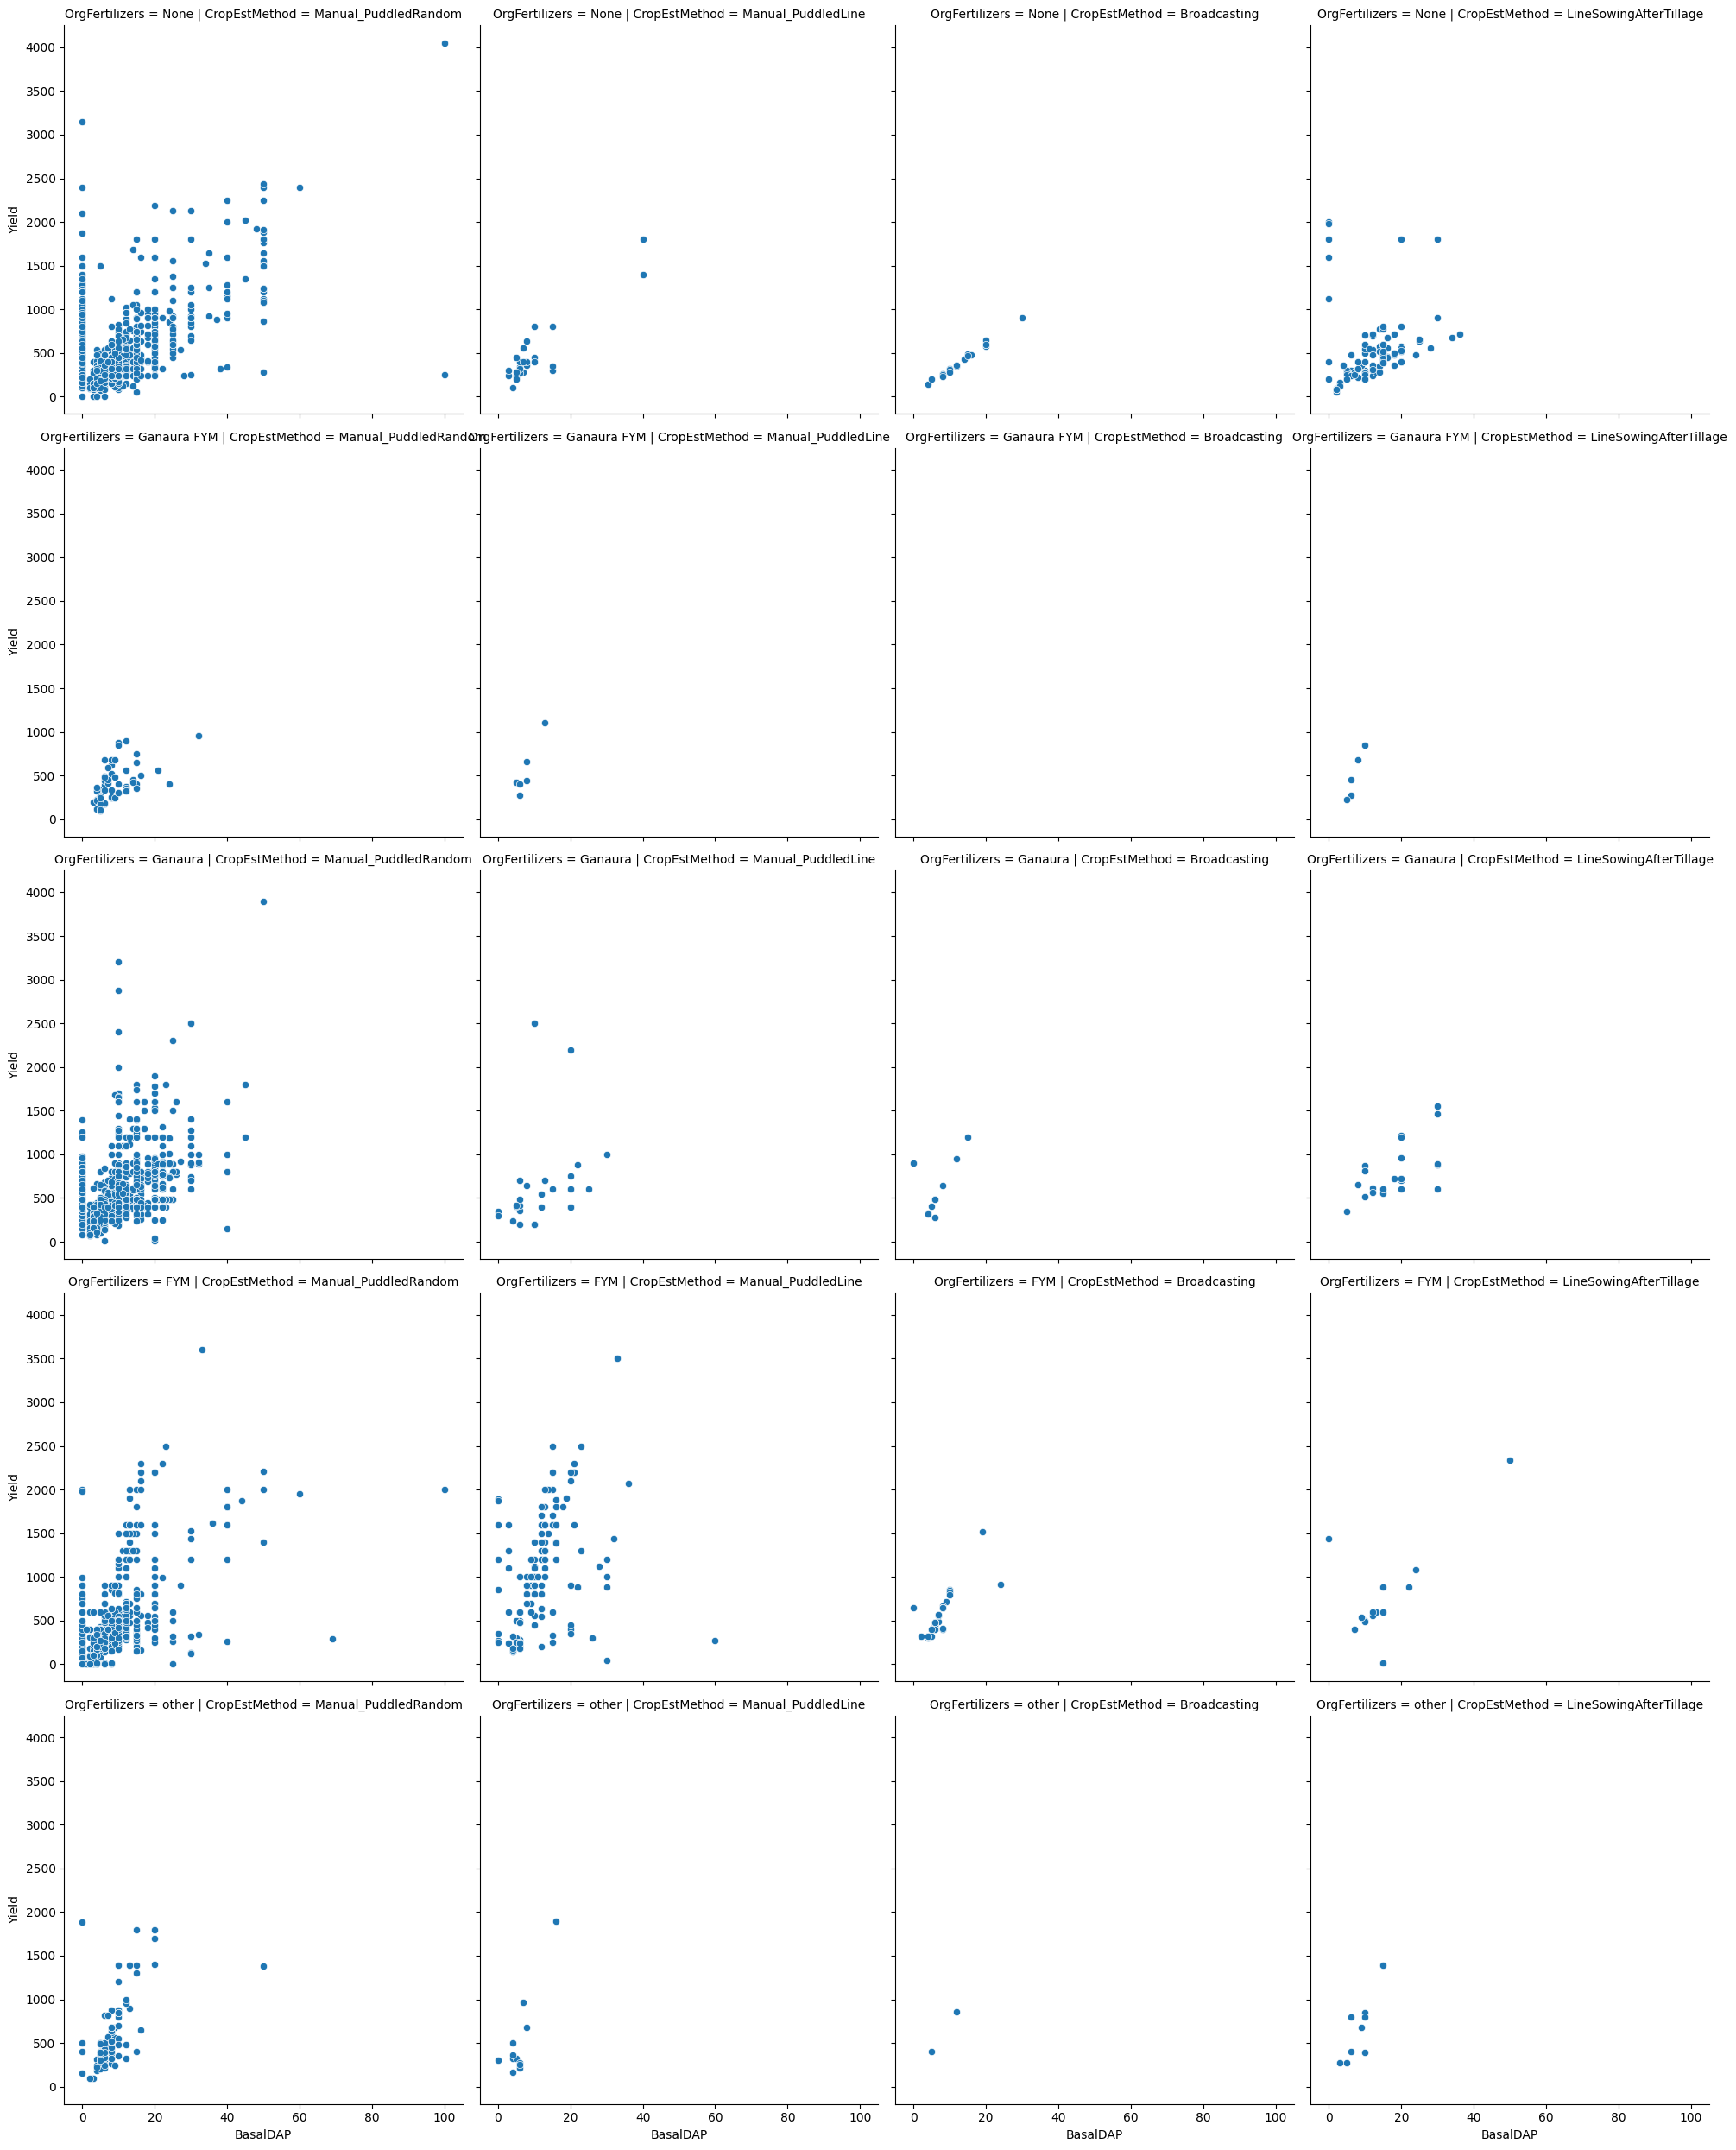

In [ ]:
sns.relplot(data=df, x='BasalDAP', y='Yield', row='OrgFertilizers', col='CropEstMethod')
plt.show()

In [ ]:
sns.relplot(data=df, x='Acre', y='Yield',hue='CropbasalFerts',size='CropOrgFYM', sizes=(5,100),  row='OrgFertilizers', col='FirstTopDressFert')
plt.show()

In [ ]:
sns.relplot(data=df, x='Acre', y='Yield',hue='CropbasalFerts',size='BasalUrea', sizes=(5,100),  row='OrgFertilizers', col='CropEstMethod')
plt.show()

In [ ]:
sns.relplot(data=df, x='Acre', y='Yield',hue='CropbasalFerts',size='BasalDAP', sizes=(5,100),  row='OrgFertilizers', col='CropEstMethod')
plt.show()

In [ ]:
def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str = 'Train correlation') -> None:
    excluded_columns = ['id']
    columns_without_excluded = [col for col in df.columns if col not in excluded_columns]
    corr = df[columns_without_excluded].select_dtypes(np.number).corr()

    fig, axes = plt.subplots(figsize=(14, 10))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='mako', annot=True, annot_kws={"size": 6})
    plt.title(title_name, color='blue')
    plt.show()

# Plot correlation heatmap for encoded dataframe
plot_correlation_heatmap(df, 'Dataset Correlation')

#

In [ ]:
df.to_csv(data_path+'cleaned_train.csv', index=False)